# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Scrapping Amazon reviews

<br></font>
</div>

# Import modules

In [84]:
import pandas as pd
import numpy as np
from pprint import pprint
import io
import os
from bs4 import BeautifulSoup
import requests,json, re
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import dateutil.parser as dparser
import pycountry

# Inspecting the webpage structure

<div class="alert alert-block alert-info">
<font color=black><br>

- [Amazon page we want to scrap](https://www.amazon.com/Short-History-Nearly-Everything/product-reviews/B0000U7N00/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1)
- Take note of the number of reviews per page and how many revies are there in total
- Each page has 10 reviews, if we want to scrap 100 we need to loop then times.
- We'll save each page in a specific location  locally.
- Depending on which operating system you have and the webrowser you'll need to change the script.

<br></font>
</div>

In [31]:
# Some general variables
outputPath = "./Amazon_Scraping_Results/"
url = "https://www.amazon.com/Short-History-Nearly-Everything/product-reviews/B0000U7N00/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1"
driver = webdriver.Chrome(ChromeDriverManager().install())




====== WebDriver manager ======
Current google-chrome version is 93.0.4577
Get LATEST driver version for 93.0.4577
Driver [/Users/gmura/.wdm/drivers/chromedriver/mac64/93.0.4577.63/chromedriver] found in cache


In [32]:
for i in range(1,11) :
    driver.get(url)
    #time.sleep(1)
    html = driver.page_source 
    soup = BeautifulSoup(html, 'html.parser')
    
    # Save all webpage locally
    with io.open(outputPath + "amazon_page_" + str(i) + ".html", "w", encoding = "utf-8") as f:
        f.write(html)

In [37]:
# Check if the pages were saved locally
!ls ./Amazon_Scraping_Results

amazon_page_1.html  amazon_page_3.html  amazon_page_6.html  amazon_page_9.html
amazon_page_10.html amazon_page_4.html  amazon_page_7.html
amazon_page_2.html  amazon_page_5.html  amazon_page_8.html


<div class="alert alert-block alert-info">
<font color=black><br>

- To scrape it, we need to understand tits HTML structure. 
- On the Chrome webpage, right click on the review and click on "inspect." 
- All the review text is wrapped in a span class called `a-size-base review-text review-text-content`.
- This is the element we need to scrap.
- We'll show it for one page and then we'll write a loop.

<br></font>
</div>

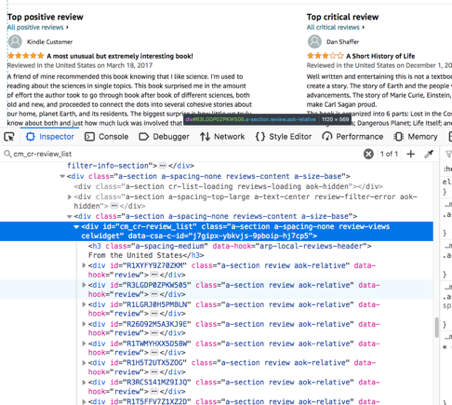

In [102]:
# Open the first page you saved
filePage1 = open(outputPath + 'amazon_page_1.html', encoding = 'utf-8')
# Create soup object
soup = BeautifulSoup(filePage1, 'html.parser')
# Scrap the span
for i in soup.find('div',{'id':'cm_cr-review_list'}):
    review = i.find('span',{'class':'a-size-base review-text review-text-content'})    
    if review is not None:        
        print(review.text.strip("\n"))
        # We'll print just one review!
        #break
    dateAndCountry = i.find('span',{'class':'a-size-base a-color-secondary review-date'})    
    if dateAndCountry is not None:        
        #print(dateAndCountry.text.strip("\n"))
        #print(dateAndCountry.text.strip("\n").split())
        # Extract just the date
        print(dparser.parse(dateAndCountry.text.strip("\n"), fuzzy = True))
        # We'll print just one review!     
        
        for country in pycountry.countries:            
            if country.name in dateAndCountry.text.strip("\n"):            
                print(country.name)        
        break
    

  A friend of mine recommended this book knowing that I like science. I'm used to reading about the sciences in single topics. This book surprised me in the amount of effort the author took to go through book after book of different sciences, both old and new, and proceeded to connect the dots into several cohesive stories about our home, planet Earth, and its residents. The biggest surprise is how little we truly know about both and just how much luck was involved that both exist in their present form.  This book is an easy read and should be understandable to anyone who has a basic interest in science.Be prepared though to being overwhelmed because there is a lot of information in this book, with references to other works. This book is best read in sections allowing yourself some time to think about what you have learned; and I'm sure you are going to learn at least a few things.I highly recommend this book to anyone who would like to understand what an amazing place our planet is an

<div class="alert alert-block alert-info">
<font color=black><br>

- Collecting all the reviews

<br></font>
</div>

In [106]:
reviews = [] 
dates = []
countries = []
# Loop through all pages
for pages in range(1,11):
    file = open(outputPath + 'amazon_page_' + str(pages) + '.html', encoding = 'utf-8')
    soup = BeautifulSoup(file, 'html.parser')
    
    # Find the reviews
    for i in soup.find('div',{'id':'cm_cr-review_list'}):
        review = i.find('span',{'class':'a-size-base review-text review-text-content'})
        
        # Append reviews to list
        if review is not None:
            reviews.append(review.text.strip("\n"))
        
        # Append date and state
        dateAndCountry = i.find('span',{'class':'a-size-base a-color-secondary review-date'})    
        if dateAndCountry is not None:                    
            dates.append(dparser.parse(dateAndCountry.text.strip("\n"), fuzzy = True))
            # We'll print just one review!     

            for country in pycountry.countries:            
                if country.name in dateAndCountry.text.strip("\n"):            
                    countries.append(country.name)        
            #break        

In [107]:
print(len(rev))

100


In [108]:
rev[0]

"  A friend of mine recommended this book knowing that I like science. I'm used to reading about the sciences in single topics. This book surprised me in the amount of effort the author took to go through book after book of different sciences, both old and new, and proceeded to connect the dots into several cohesive stories about our home, planet Earth, and its residents. The biggest surprise is how little we truly know about both and just how much luck was involved that both exist in their present form.  This book is an easy read and should be understandable to anyone who has a basic interest in science.Be prepared though to being overwhelmed because there is a lot of information in this book, with references to other works. This book is best read in sections allowing yourself some time to think about what you have learned; and I'm sure you are going to learn at least a few things.I highly recommend this book to anyone who would like to understand what an amazing place our planet is a

In [110]:
df = pd.DataFrame()
df["reviews"] = reviews
df["dates"] = dates
df["countries"] = countries
df

,reviews,dates,countries
0,A friend of mine recommended this book knowi...,2017-03-18,United States
1,I have just completed Bill Bryson’s “A Short...,2017-12-19,United States
2,Well written and entertaining this is not a ...,2017-12-01,United States
3,"First, I 'd like to establish that I'm not a...",2018-10-26,United States
4,"I read the hardcover version first, all the ...",2017-02-10,United States
...,...,...,...
95,I've owned this book in three versions: big ...,2017-04-21,United States
96,So the title of the book intrigues you and t...,2018-11-15,United States
97,A most interesting read with plenty of numbe...,2018-01-08,United States
98,I read a fair amount of popular science book...,2017-06-25,United States


# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://www.natasshaselvaraj.com/web-scraping/
- [How to in stall Firefox geckodriver]([https://stackoverflow.com/questions/41435983/selenium-in-python-on-mac-geckodriver-executable-needs-to-be-in-path)
- [What is GeckoDriver?](https://pythonbasics.org/selenium-firefox/)
    
<br></font>
</div>

# Conclusions

<div class="alert alert-block alert-danger">
<font color=black><br>

-  This can be used to build a database to train a sentiment analysis model.

<br></font>
</div>